## Visualization
Start with the basics
- Quantitives
- Aestetics

# Pandas and visualization
How to (tools) visualize data organized as pandas DataFrame?
1. Pandas has Matlab-lookalike plotting package based on matplotlib
  * (+) High quality rendering, 
  * (-) 90'era scientific look and feel as default, limited types of plots

2. plotly / seaborn
  * (+) Rich in possibilities, less stiff and mature
  * (-) Adjusments can be complicated
3. plotnine - A Grammar of Graphics for Python
  * (+) Rules for forming plots - "grammar", less stiff and more modern look and feel
  * (-) Not fully matured 

4. Do it manually (on paper or a drawing program (computer)).
    * (+) Only limited by you drawing abilities
    * (-) Too many possibilities may make us *too* creative
    
Using plotting tools for publication quality products often requires time-consuming hand-tweaking.

And remember: we should not go for "Isn't it remarkable that the computer can be programmed to draw like that?" but "My, what interesting data." (Tufte, 1983)

In [1]:
import seaborn as sns

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

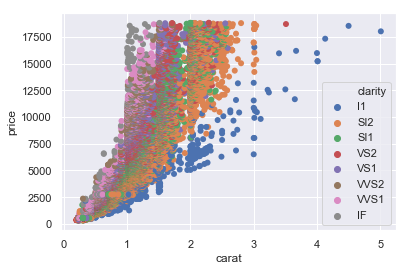

In [262]:
# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")
sns.set()
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds)

/home/tlj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


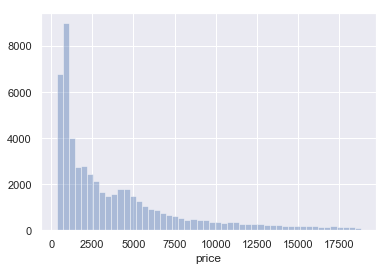

In [263]:
# histogram/density and kernel density estimate
sns.distplot(diamonds['price'], kde=False)

## Working with data from Danmarks Statistik
- Education - parents/children relation
- Pre-proccesed, ../data_examples/education.ipynb
  * Getting data from DST API
  * Selecting year=2018
  * Only selecting cumulated values (in total, and not per age)

In [264]:
import requests
url = 'https://api.statbank.dk/v1/tableinfo'
params = {"lang": "en", "table": "STATUS46", "format": "JSON"}
resp = requests.post(url, data=params)
j = resp.json()

In [265]:
j['variables']

[{'id': 'STATUSVID',
  'text': 'status for higher education',
  'elimination': True,
  'time': False,
  'values': [{'id': '400', 'text': 'TOTAL'},
   {'id': '110', 'text': 'COMPLETED HIGHER EDUCATION'},
   {'id': '210', 'text': 'UNDERGOING HIGHER EDUCATION'},
   {'id': '310', 'text': 'NO HIGHER EDUCATION'},
   {'id': '350', 'text': 'DISCONTINUED HIGHER EDUCATION'},
   {'id': '360', 'text': 'NOT STATED'}]},
 {'id': 'ALDER',
  'text': 'age',
  'elimination': True,
  'time': False,
  'values': [{'id': 'IALT', 'text': 'Total'},
   {'id': '25', 'text': '25 years'},
   {'id': '26', 'text': '26 years'},
   {'id': '27', 'text': '27 years'},
   {'id': '28', 'text': '28 years'},
   {'id': '29', 'text': '29 years'},
   {'id': '30', 'text': '30 years'},
   {'id': '31', 'text': '31 years'},
   {'id': '32', 'text': '32 years'},
   {'id': '33', 'text': '33 years'},
   {'id': '34', 'text': '34 years'},
   {'id': '35', 'text': '35 years'},
   {'id': '36', 'text': '36 years'},
   {'id': '37', 'text': '3

In [266]:
dataparams = {"lang": "en", "table": "STATUS46", "format": "JSONSTAT",
       "valuePresentation": "Value",
       "variables": [
          {"code": "Tid", "values": ["2018"]},
          {"code": "STATUSVID", "values": ["*"]},
          {"code": "FORBESK", "values": ["*"]},
          {"code": "ALDER", "values": ["IALT"]}
       ]
}

In [267]:
urldata = 'https://api.statbank.dk/v1/data'
resp = requests.post(urldata, json=dataparams)

In [268]:
jdata = resp.json()

In [269]:
sdims = [jj for jj in jdata['dataset']['dimension']['size'] if jj > 1]

In [270]:
idims = [ii for ii, jj in enumerate(jdata['dataset']['dimension']['size']) if jj > 1]

In [271]:
dim = 3
v = np.array(jdata['dataset']['value']).reshape(sdims)

In [272]:
names = np.array(jdata['dataset']['dimension']['id'])[idims]

In [273]:
jdata['dataset']['dimension']['STATUSVID']['category']['label']

{'400': 'TOTAL',
 '110': 'COMPLETED HIGHER EDUCATION',
 '210': 'UNDERGOING HIGHER EDUCATION',
 '310': 'NO HIGHER EDUCATION',
 '350': 'DISCONTINUED HIGHER EDUCATION',
 '360': 'NOT STATED'}

In [274]:
jdata['dataset']['dimension']['FORBESK']['category']['label'].values()

dict_values(['TOTAL', 'Both parents employed', 'One parent employed', 'No parent employed', 'No registration'])

In [275]:
iterables = [list(jdata['dataset']['dimension'][n]['category']['label'].values()) for n in names]

In [276]:
indices = pd.MultiIndex.from_product(iterables, names=names)

In [277]:
df = pd.DataFrame(jdata['dataset']['value'], index=indices, columns=['values']).reset_index()

In [278]:
#remove total
df = df[df['STATUSVID'] != 'TOTAL']
df = df[df['FORBESK'] != 'TOTAL']

## [Seaborn](https://seaborn.pydata.org/)
* Build on top of Matplotlib - high level interface.
* More appealing aestics
* Less manual adjustments compared to Matplotlib
  * But adjustments are still with Matplotlib - Google is your friend

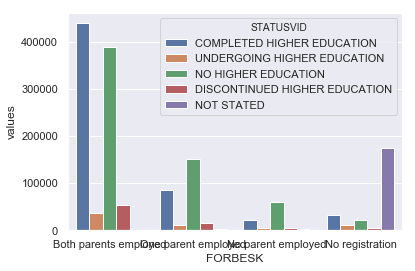

In [280]:
sns.barplot(x=df['FORBESK'], y=df['values'], hue=df['STATUSVID'])

* What do we like/dislike?
* [The Principle of Propotional Ink](https://callingbullshit.org/tools/tools_proportional_ink.html)
* Entering an iterative process

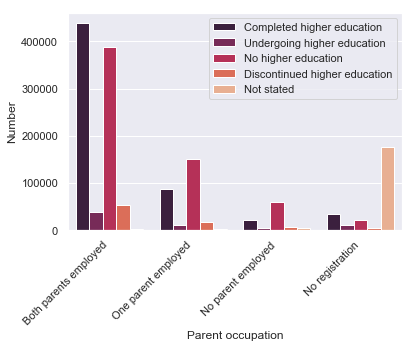

In [289]:
# 1. Change DataFrame
df['Parent occupation'] = df['FORBESK']
df['Number'] = df['values']
df['Upper-level education status'] = df['STATUSVID']
df['Upper-level education status'] = df['Upper-level education status'].str.capitalize()
# 1. Plot
bar = sns.barplot(x='Parent occupation', y='Number', hue='Upper-level education status',
           data=df, palette="rocket")
# Keep labels but rotate
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
bar.legend()

In [291]:
# Saving
file = 'col_upper_case_education_parent_occupation_2018'
bar.get_figure().savefig('{}.jpg'.format(file))
bar.get_figure().savefig('{}.pdf'.format(file))
bar.get_figure().savefig('{}.png'.format(file))

# Visualization and preprocessing of survey data
* XML to Pandas DataFrames
* Plot with seaborn

In [47]:
from urllib.request import urlopen
import xml.etree.cElementTree as et

In [48]:
url = 'https://www.b.dk/upload/webred/bmsandbox/opinion_poll/2019/pollofpolls.xml'
xml_data = urlopen(url).read()
root = et.fromstring(xml_data)

## Wide vs. long format
- Wide: one row with several observations
- Long : one row = one observation
- [Tidy data](https://www.jstatsoft.org/index.php/jss/article/view/v059i10/v59i10.pdf)
  * Each variable must have its own column.
  * Each observation must have its own row.
  * Each value must have its own cell.

In [49]:
df = pd.DataFrame(columns=['datetime', 'party', 'percent'])
for child in root.iter('poll'):
    dt = pd.to_datetime(child.find('datetime').text)
    entries = child.find('entries')
    for entry in entries:
        d = dict()
        d['datetime'] = dt
        d['party'] = entry.find('party').find('letter').text
        d['percent'] = float(entry.find('percent').text)
        df = df.append(d, ignore_index=True)
df['party'] = df['party'].astype('category')

In [95]:
df

,datetime,party,percent
0,2019-11-10,P,1.3
1,2019-11-10,E,0.3
2,2019-11-10,D,2.0
3,2019-11-10,K,1.3
4,2019-11-10,C,7.1
5,2019-11-10,I,2.2
6,2019-11-10,O,9.2
7,2019-11-10,V,23.5
8,2019-11-10,Å,2.2
9,2019-11-10,Ø,7.7


Text(0, 0.5, 'Percentage [%]')

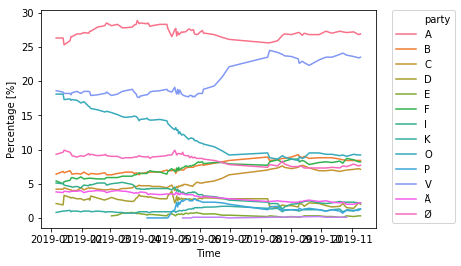

In [112]:
plt.figure()
p = sns.lineplot(data=df, x='datetime', y='percent', hue='party')
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
p.set_xlabel('Time')
p.set_ylabel('Percentage [%]')

## References
[Fundamentals of Data Visualization, Wilke](https://serialmentor.com/dataviz/)

Edward R. Tufte, The Visual Display of Quantitive Information, Graphics Press, 1983

[The Principle of Propotional Ink, Carl Bergstrom and Jevin West](https://callingbullshit.org/tools/tools_proportional_ink.html)